In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("file:///F:/number-of-deaths-by-risk-factor.csv")
df

Entity  Year  Unsafe water source  Unsafe sanitation  \
0     Afghanistan  1990          7554.049543        5887.747628   
1     Afghanistan  1991          7359.676749        5732.770160   
2     Afghanistan  1992          7650.437822        5954.804987   
3     Afghanistan  1993         10270.731380        7986.736613   
4     Afghanistan  1994         11409.177110        8863.010065   
...           ...   ...                  ...                ...   
6463     Zimbabwe  2013          4254.282075        2977.649750   
6464     Zimbabwe  2014          4098.769691        2856.426187   
6465     Zimbabwe  2015          3921.291358        2717.735794   
6466     Zimbabwe  2016          3802.257512        2624.315858   
6467     Zimbabwe  2017          3796.070615        2612.122560   

      No access to handwashing facility  \
0                           5412.314513   
1                           5287.891103   
2                           5506.657363   
3                           7104.620351   
4                           8051.515953   
...                                 ...   
6463                        3913.210510   
6464                        3809.245683   
6465                        3688.442102   
6466                        3603.179799   
6467                        3579.352078   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                                 22388.497230                  3221.138842   
1                                 22128.758210                  3150.559597   
2                                 22873.768790                  3331.349048   
3                                 25599.756280                  4477.006100   
4                                 28013.167200                  5102.622054   
...                                        ...                          ...   
6463                               7613.561005                  1037.968042   
6464                               7429.446352                   972.886327   
6465                               7267.029297                   912.248164   
6466                               7134.595677                   875.706009   
6467                               6982.337249                   866.902012   

      Discontinued breastfeeding  Child wasting  Child stunting  ...  \
0                     156.097553   22778.849250    10408.438850  ...   
1                     151.539851   22292.691110    10271.976430  ...   
2                     156.609194   23102.197940    10618.879780  ...   
3                     206.834451   27902.669960    12260.093840  ...   
4                     233.930571   32929.005930    14197.947960  ...   
...                          ...            ...             ...  ...   
6463                   59.150493    7703.062474     1317.296056  ...   
6464                   54.334796    7401.059382     1259.989023  ...   
6465                   50.255551    7100.476546     1205.589945  ...   
6466                   47.719473    6823.766727     1099.871279  ...   
6467                   46.816760    6609.236886     1021.437703  ...   

      High systolic blood pressure      Smoking  Iron deficiency  \
0                      28183.98335  6393.667372       726.431294   
1                      28435.39751  6429.253320       739.245799   
2                      29173.61120  6561.054957       873.485341   
3                      30074.76091  6731.972560      1040.047422   
4                      30809.49117  6889.328118      1101.764645   
...                            ...          ...              ...   
6463                   11077.32708  9099.552194       382.544583   
6464                   11015.12167  8902.223776       353.386096   
6465                   11005.40982  8818.570004       332.355373   
6466                   11096.18244  8758.486720       319.692576   
6467                   11243.08932  8714.714332       310.669683   

      Vitamin A deficiency  Low bone mineral density  Air 

In [4]:
df.shape

(6468, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Year                                      6468 non-null   int64  
 2   Unsafe water source                       6468 non-null   float64
 3   Unsafe sanitation                         6468 non-null   float64
 4   No access to handwashing facility         6468 non-null   float64
 5   Household air pollution from solid fuels  6468 non-null   float64
 6   Non-exclusive breastfeeding               6468 non-null   float64
 7   Discontinued breastfeeding                6468 non-null   float64
 8   Child wasting                             6468 non-null   float64
 9   Child stunting                            6468 non-null   float64
 10  Low birth weight for gestation      

In [6]:
df=df.fillna(0)

In [7]:
df.dtypes

Entity                                       object
Year                                          int64
Unsafe water source                         float64
Unsafe sanitation                           float64
No access to handwashing facility           float64
Household air pollution from solid fuels    float64
Non-exclusive breastfeeding                 float64
Discontinued breastfeeding                  float64
Child wasting                               float64
Child stunting                              float64
Low birth weight for gestation              float64
Secondhand smoke                            float64
Alcohol use                                 float64
Drug use                                    float64
Diet low in fruits                          float64
Diet low in vegetables                      float64
Unsafe sex                                  float64
Low physical activity                       float64
High fasting plasma glucose                 float64
High total c

In [10]:
df.describe().T

count           mean  \
Year                                      6468.0    2003.500000   
Unsafe water source                       6468.0   31566.317807   
Unsafe sanitation                         6468.0   23374.362141   
No access to handwashing facility         6468.0   18933.050500   
Household air pollution from solid fuels  6468.0   43084.206901   
Non-exclusive breastfeeding               6468.0    6231.427632   
Discontinued breastfeeding                6468.0     409.110423   
Child wasting                             6468.0   43446.432828   
Child stunting                            6468.0   11767.717972   
Low birth weight for gestation            6468.0   30948.006623   
Secondhand smoke                          6468.0   24282.250536   
Alcohol use                               6468.0   50203.341291   
Drug use                                  6468.0    8890.242150   
Diet low in fruits                        6468.0   45452.642748   
Diet low in vegetables                    6468.0   28742.012912   
Unsafe sex                                6468.0   26764.450110   
Low physical activity                     6468.0   21141.486434   
High fasting plasma glucose               6468.0   99555.714649   
High total cholesterol                    6468.0   12460.064196   
High body-mass index                      6468.0   68685.287815   
High systolic blood pressure              6468.0  174383.185897   
Smoking                                   6468.0  133548.348210   
Iron deficiency                           6468.0    1878.745701   
Vitamin A deficiency                      6468.0   11908.622027   
Low bone mineral density                  6468.0    4579.055654   
Air pollution                             6468.0   95735.506099   
Outdoor air pollution                     6468.0   55564.535264   
Diet high in sodium                       6468.0   54240.674047   
Diet low in whole grains                  6468.0   53348.812853   
Diet low in nuts and seeds                6468.0   34967.039529   

                                                    std          min  \
Year                                           8.078372  1990.000000   
Unsafe water source                       152773.116467     0.008650   
Unsafe sanitation                         114493.039414     0.006496   
No access to handwashing facility          89810.372691     0.077914   
Household air pollution from solid fuels  187734.464522     0.020585   
Non-exclusive breastfeeding                28517.846341     0.003816   
Discontinued breastfeeding                  1874.989431     0.000520   
Child wasting                             202236.710526     0.101713   
Child stunting                             58248.914775     0.001401   
Low birth weight for gestation            134294.632657     0.326638   
Secondhand smoke                          100256.183193     2.890665   
Alcohol use                               195822.608202 -2315.344758   
Drug use                                   35415.115589     1.240062   
Diet low in fruits                        183428.565074     1.578807   
Diet low in vegetables                    111659.952882     0.776438   
Unsafe sex                                121709.063241     1.021822   
Low physical activity                      82215.985896     2.416705   
High fasting plasma glucose               384033.016304    21.042632   
High total cholesterol                    133129.364682     0.000000   
High body-mass index                      268134.065820    19.998208   
High systolic blood pressure              680991.545760    21.026071   
Smoking                                   529931.503714    11.707478   
Iron deficiency                             9011.891580     0.005499   
Vitamin A deficiency                       58801.648611     0.003465   
Low bone mineral density                   18884.513384     0.381232   
Air pollution                             390933.534804     8.524593   
Outdoor air pollution

In [9]:
df.corr().describe().T

count      mean       std       min  \
Year                                       30.0  0.028234  0.188640 -0.083592   
Unsafe water source                        30.0  0.766840  0.218966 -0.033763   
Unsafe sanitation                          30.0  0.758462  0.224420 -0.043005   
No access to handwashing facility          30.0  0.764696  0.222216 -0.034788   
Household air pollution from solid fuels   30.0  0.826787  0.195205 -0.036266   
Non-exclusive breastfeeding                30.0  0.768391  0.225870 -0.071945   
Discontinued breastfeeding                 30.0  0.745444  0.224091 -0.073736   
Child wasting                              30.0  0.756495  0.230207 -0.070183   
Child stunting                             30.0  0.725509  0.239566 -0.082384   
Low birth weight for gestation             30.0  0.815242  0.205867 -0.037519   
Secondhand smoke                           30.0  0.822299  0.209739 -0.007547   
Alcohol use                                30.0  0.830811  0.209330  0.029528   
Drug use                                   30.0  0.793638  0.220267  0.051262   
Diet low in fruits                         30.0  0.820084  0.217819  0.012835   
Diet low in vegetables                     30.0  0.837257  0.210069  0.004500   
Unsafe sex                                 30.0  0.691511  0.161038  0.037051   
Low physical activity                      30.0  0.792889  0.221153  0.027403   
High fasting plasma glucose                30.0  0.811804  0.212952  0.047415   
High total cholesterol                     30.0  0.392753  0.139161  0.005756   
High body-mass index                       30.0  0.772353  0.225497  0.054734   
High systolic blood pressure               30.0  0.813876  0.221929  0.028078   
Smoking                                    30.0  0.805692  0.224812  0.011831   
Iron deficiency                            30.0  0.765546  0.221620 -0.044054   
Vitamin A deficiency                       30.0  0.717704  0.240003 -0.083592   
Low bone mineral density                   30.0  0.808911  0.203296  0.056290   
Air pollution                              30.0  0.849163  0.197440  0.000434   
Outdoor air pollution                      30.0  0.817560  0.216510  0.028522   
Diet high in sodium                        30.0  0.735840  0.235376  0.022474   
Diet low in whole grains                   30.0  0.819740  0.218975  0.021916   
Diet low in nuts and seeds                 30.0  0.817639  0.214333  0.025781   

                                               25%       50%       75%  max  
Year                                     -0.037206  0.008793  0.028411  1.0  
Unsafe water source                       0.696765  0.747106  0.955935  1.0  
Unsafe sanitation                         0.679241  0.729542  0.966292  1.0  
No access to handwashing facility         0.688161  0.735039  0.968733  1.0  
Household air pollution from solid fuels  0.827262  0.877704  0.911195  1.0  
Non-exclusive breastfeeding               0.693981  0.753280  0.970675  1.0  
Discontinued breastfeeding                0.668058  0.722854  0.939818  1.0  
Child wasting                             0.671747  0.730932  0.972045  1.0  
Child stunting                            0.622980  0.684448  0.965818  1.0  
Low birth weight for gestation            0.784920  0.816285  0.960657  1.0  
Secondhand smoke                          0.735264  0.917434  0.961464  1.0  
Alcohol use                               0.736531  0.939373  0.976668  1.0  
Drug use                                  0.649446  0.931132  0.965345  1.0  
Diet low in fruits                        0.699977  0.939288  0.981470  1.0  
Diet low in vegetables                    0.748600  0.932876  0.978862  1.0  
Unsafe sex                                0.673528  0.711107  0.768088  1.0  
Low physical activity                     0.659235  0.894895  0.969558  1.0  
High fasting plasma glucose               0.696578  0.907449  0.976540  1.0  
High total cholesterol                    0.3470

In [11]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                                          2003.500000
Unsafe water source                          31566.317807
Unsafe sanitation                            23374.362141
No access to handwashing facility            18933.050500
Household air pollution from solid fuels     43084.206901
Non-exclusive breastfeeding                   6231.427632
Discontinued breastfeeding                     409.110423
Child wasting                                43446.432828
Child stunting                               11767.717972
Low birth weight for gestation               30948.006623
Secondhand smoke                             24282.250536
Alcohol use                                  50203.341291
Drug use                                      8890.242150
Diet low in fruits                           45452.642748
Diet low in vegetables                       28742.012912
Unsafe sex                                   26764.450110
Low physical activity                        21141.486434
High fasting p

In [12]:
df.min()

Entity                                      Afghanistan
Year                                               1990
Unsafe water source                             0.00865
Unsafe sanitation                              0.006496
No access to handwashing facility              0.077914
Household air pollution from solid fuels       0.020585
Non-exclusive breastfeeding                    0.003816
Discontinued breastfeeding                      0.00052
Child wasting                                  0.101713
Child stunting                                 0.001401
Low birth weight for gestation                 0.326638
Secondhand smoke                               2.890665
Alcohol use                                -2315.344758
Drug use                                       1.240062
Diet low in fruits                             1.578807
Diet low in vegetables                         0.776438
Unsafe sex                                     1.021822
Low physical activity                          2

In [13]:
df.max()

Entity                                         Zimbabwe
Year                                               2017
Unsafe water source                         2111659.077
Unsafe sanitation                           1638021.199
No access to handwashing facility           1239519.421
Household air pollution from solid fuels     2708904.82
Non-exclusive breastfeeding                 514102.3516
Discontinued breastfeeding                  34850.39553
Child wasting                               3365308.624
Child stunting                              1001277.449
Low birth weight for gestation              1976612.538
Secondhand smoke                            1260994.206
Alcohol use                                 2842854.196
Drug use                                    585348.1802
Diet low in fruits                          2423447.368
Diet low in vegetables                      1462367.411
Unsafe sex                                  1771140.671
Low physical activity                       1263

In [14]:
df.head()

Entity  Year  Unsafe water source  Unsafe sanitation  \
0  Afghanistan  1990          7554.049543        5887.747628   
1  Afghanistan  1991          7359.676749        5732.770160   
2  Afghanistan  1992          7650.437822        5954.804987   
3  Afghanistan  1993         10270.731380        7986.736613   
4  Afghanistan  1994         11409.177110        8863.010065   

   No access to handwashing facility  \
0                        5412.314513   
1                        5287.891103   
2                        5506.657363   
3                        7104.620351   
4                        8051.515953   

   Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                               22388.49723                  3221.138842   
1                               22128.75821                  3150.559597   
2                               22873.76879                  3331.349048   
3                               25599.75628                  4477.006100   
4                               28013.16720                  5102.622054   

   Discontinued breastfeeding  Child wasting  Child stunting  ...  \
0                  156.097553    22778.84925     10408.43885  ...   
1                  151.539851    22292.69111     10271.97643  ...   
2                  156.609194    23102.19794     10618.87978  ...   
3                  206.834451    27902.66996     12260.09384  ...   
4                  233.930571    32929.00593     14197.94796  ...   

   High systolic blood pressure      Smoking  Iron deficiency  \
0                   28183.98335  6393.667372       726.431294   
1                   28435.39751  6429.253320       739.245799   
2                   29173.61120  6561.054957       873.485341   
3                   30074.76091  6731.972560      1040.047422   
4                   30809.49117  6889.328118      1101.764645   

   Vitamin A deficiency  Low bone mineral density  Air pollution  \
0           9344.131952                374.844056    26598.00673   
1           9330.182378                379.854237    26379.53222   
2           9769.844533                388.130434    27263.12791   
3          11433.769490                405.577931    30495.56150   
4          12936.955860                415.349195    33323.16140   

   Outdoor air pollution  Diet high in sodium  Diet low in whole grains  \
0                4383.83          2737.197934               11381.37735   
1                4426.36          2741.184956               11487.83239   
2                4568.91          2798.560245               11866.23557   
3                5080.29          2853.301679               12335.96168   
4                5499.23          2880.025765               12672.95019   

   Diet low in nuts and seeds  
0                 7299.867330  
1                 7386.764303  
2                 7640.628526  
3                 7968.311853  
4                 8244.368430  

[5 rows x 31 columns]

In [15]:
df=df.drop(['Year'],axis='columns')

In [16]:
x=df.drop(['Entity'],axis='columns')

In [17]:
y=df.Entity.values

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [22]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

96.08449252962392

In [23]:
print(classification_report(ytest,pred_tre))

                                                  precision    recall  f1-score   support

                                     Afghanistan       1.00      1.00      1.00         6
                                         Albania       1.00      0.83      0.91         6
                                         Algeria       1.00      1.00      1.00         6
                                  American Samoa       1.00      0.91      0.95        11
                            Andean Latin America       0.88      0.88      0.88         8
                                         Andorra       1.00      0.83      0.91        12
                                          Angola       0.78      1.00      0.88         7
                             Antigua and Barbuda       0.89      1.00      0.94         8
                                       Argentina       1.00      1.00      1.00        11
                                         Armenia       1.00      1.00      1.00        12
         

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

96.08449252962392

In [26]:
print(classification_report(ytest,pred_kne))

                                                  precision    recall  f1-score   support

                                     Afghanistan       1.00      1.00      1.00         6
                                         Albania       1.00      1.00      1.00         6
                                         Algeria       0.86      1.00      0.92         6
                                  American Samoa       1.00      1.00      1.00        11
                            Andean Latin America       1.00      1.00      1.00         8
                                         Andorra       1.00      0.92      0.96        12
                                          Angola       1.00      1.00      1.00         7
                             Antigua and Barbuda       1.00      0.88      0.93         8
                                       Argentina       1.00      1.00      1.00        11
                                         Armenia       0.92      1.00      0.96        12
         

In [29]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

99.22720247295209

In [32]:
print(classification_report(ytest,pred_bag))

                                                  precision    recall  f1-score   support

                                     Afghanistan       1.00      1.00      1.00         6
                                         Albania       1.00      1.00      1.00         6
                                         Algeria       1.00      1.00      1.00         6
                                  American Samoa       1.00      1.00      1.00        11
                            Andean Latin America       1.00      1.00      1.00         8
                                         Andorra       1.00      0.83      0.91        12
                                          Angola       1.00      1.00      1.00         7
                             Antigua and Barbuda       1.00      1.00      1.00         8
                                       Argentina       1.00      1.00      1.00        11
                                         Armenia       1.00      1.00      1.00        12
         

In [33]:
from sklearn.svm import SVC

In [34]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_l=accuracy_score(ytest,pre_siv)*100
accu_l

10.922205048943843

In [35]:
print(classification_report(ytest,pre_siv))

                                                  precision    recall  f1-score   support

                                     Afghanistan       0.00      0.00      0.00         6
                                         Albania       0.00      0.00      0.00         6
                                         Algeria       0.00      0.00      0.00         6
                                  American Samoa       0.00      0.00      0.00        11
                            Andean Latin America       0.00      0.00      0.00         8
                                         Andorra       0.00      0.00      0.00        12
                                          Angola       0.00      0.00      0.00         7
                             Antigua and Barbuda       0.00      0.00      0.00         8
                                       Argentina       0.00      0.00      0.00        11
                                         Armenia       0.00      0.00      0.00        12
         

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.naive_bayes import GaussianNB

In [38]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_gau=accuracy_score(ytest,pre_gau)*100
accu_gau

96.29057187017001

In [39]:
print(classification_report(ytest,pre_gau))

                                                  precision    recall  f1-score   support

                                     Afghanistan       1.00      1.00      1.00         6
                                         Albania       1.00      1.00      1.00         6
                                         Algeria       1.00      1.00      1.00         6
                                  American Samoa       1.00      0.91      0.95        11
                            Andean Latin America       1.00      1.00      1.00         8
                                         Andorra       1.00      1.00      1.00        12
                                          Angola       1.00      1.00      1.00         7
                             Antigua and Barbuda       0.78      0.88      0.82         8
                                       Argentina       1.00      1.00      1.00        11
                                         Armenia       1.00      1.00      1.00        12
         

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)
accu_ada

0.02215352910870685

In [42]:
print(classification_report(ytest,pre_ada))

                                                  precision    recall  f1-score   support

                                     Afghanistan       0.00      0.00      0.00         6
                                         Albania       0.00      0.00      0.00         6
                                         Algeria       0.00      0.00      0.00         6
                                  American Samoa       0.00      0.00      0.00        11
                            Andean Latin America       0.00      0.00      0.00         8
                                         Andorra       1.00      1.00      1.00        12
                                          Angola       0.00      0.00      0.00         7
                             Antigua and Barbuda       0.00      0.00      0.00         8
                                       Argentina       0.00      0.00      0.00        11
                                         Armenia       0.00      0.00      0.00        12
         

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

99.63936115404431

In [48]:
print(classification_report(ytest,pre_etc))

                                                  precision    recall  f1-score   support

                                     Afghanistan       1.00      1.00      1.00         6
                                         Albania       1.00      1.00      1.00         6
                                         Algeria       1.00      1.00      1.00         6
                                  American Samoa       1.00      1.00      1.00        11
                            Andean Latin America       1.00      1.00      1.00         8
                                         Andorra       1.00      1.00      1.00        12
                                          Angola       1.00      1.00      1.00         7
                             Antigua and Barbuda       1.00      1.00      1.00         8
                                       Argentina       1.00      1.00      1.00        11
                                         Armenia       1.00      1.00      1.00        12
         

In [50]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier',  'KNeighborsClassifier'
             ,'BaggingClassifier','SVC','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier'],
    'Score': [ accu_tre, accu_kne,accu_bag,accu_l,accu_gau,accu_ada,accu_etc]
})

models.sort_values(by = 'Score', ascending = False)

Model      Score
6    ExtraTreesClassifier  99.639361
2       BaggingClassifier  99.227202
3                     SVC  96.290572
4              GaussianNB  96.290572
0  DecisionTreeClassifier  96.084493
1    KNeighborsClassifier  96.084493
5      AdaBoostClassifier   0.022154

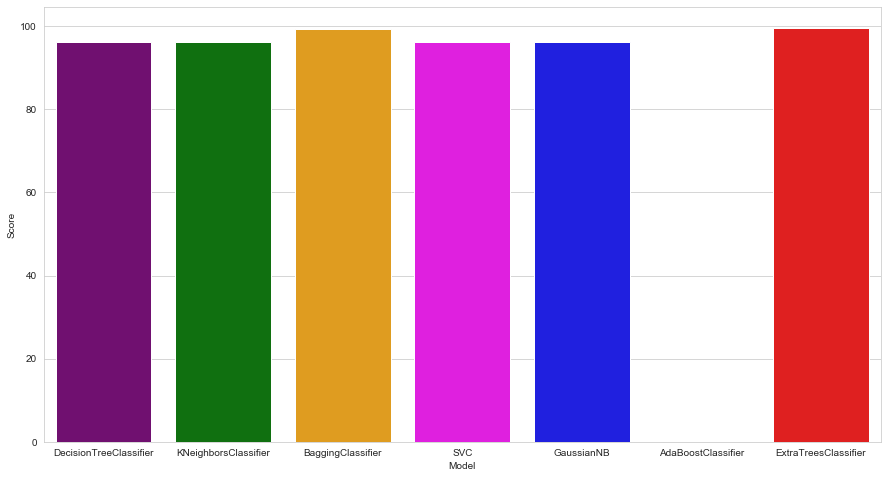

In [51]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [52]:
import sweetviz as sv

In [53]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [54]:
from IPython.display import IFrame

In [55]:
IFrame(src='Analyze.html',width=1000,height=600)

In [56]:
df.head()

Entity  Unsafe water source  Unsafe sanitation  \
0  Afghanistan          7554.049543        5887.747628   
1  Afghanistan          7359.676749        5732.770160   
2  Afghanistan          7650.437822        5954.804987   
3  Afghanistan         10270.731380        7986.736613   
4  Afghanistan         11409.177110        8863.010065   

   No access to handwashing facility  \
0                        5412.314513   
1                        5287.891103   
2                        5506.657363   
3                        7104.620351   
4                        8051.515953   

   Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                               22388.49723                  3221.138842   
1                               22128.75821                  3150.559597   
2                               22873.76879                  3331.349048   
3                               25599.75628                  4477.006100   
4                               28013.16720                  5102.622054   

   Discontinued breastfeeding  Child wasting  Child stunting  \
0                  156.097553    22778.84925     10408.43885   
1                  151.539851    22292.69111     10271.97643   
2                  156.609194    23102.19794     10618.87978   
3                  206.834451    27902.66996     12260.09384   
4                  233.930571    32929.00593     14197.94796   

   Low birth weight for gestation  ...  High systolic blood pressure  \
0                     12168.56463  ...                   28183.98335   
1                     12360.63537  ...                   28435.39751   
2                     13459.59372  ...                   29173.61120   
3                     18458.42913  ...                   30074.76091   
4                     19958.38854  ...                   30809.49117   

       Smoking  Iron deficiency  Vitamin A deficiency  \
0  6393.667372       726.431294           9344.131952   
1  6429.253320       739.245799           9330.182378   
2  6561.054957       873.485341           9769.844533   
3  6731.972560      1040.047422          11433.769490   
4  6889.328118      1101.764645          12936.955860   

   Low bone mineral density  Air pollution  Outdoor air pollution  \
0                374.844056    26598.00673                4383.83   
1                379.854237    26379.53222                4426.36   
2                388.130434    27263.12791                4568.91   
3                405.577931    30495.56150                5080.29   
4                415.349195    33323.16140                5499.23   

   Diet high in sodium  Diet low in whole grains  Diet low in nuts and seeds  
0          2737.197934               11381.37735                 7299.867330  
1          2741.184956               11487.83239                 7386.764303  
2          2798.560245               11866.23557                 7640.628526  
3          2853.301679               12335.96168                 7968.311853  
4          2880.025765               12672.95019                 8244.368430  

[5 rows x 30 columns]

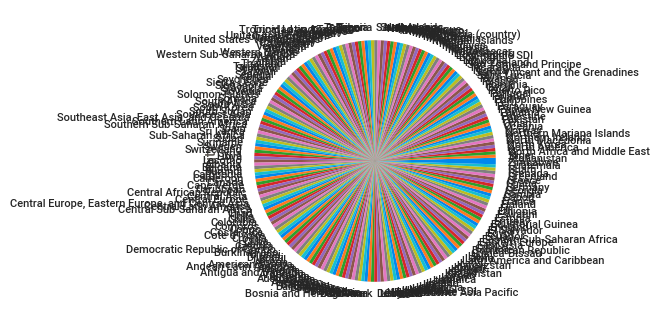

In [57]:
df.Entity.value_counts().plot(kind='pie')

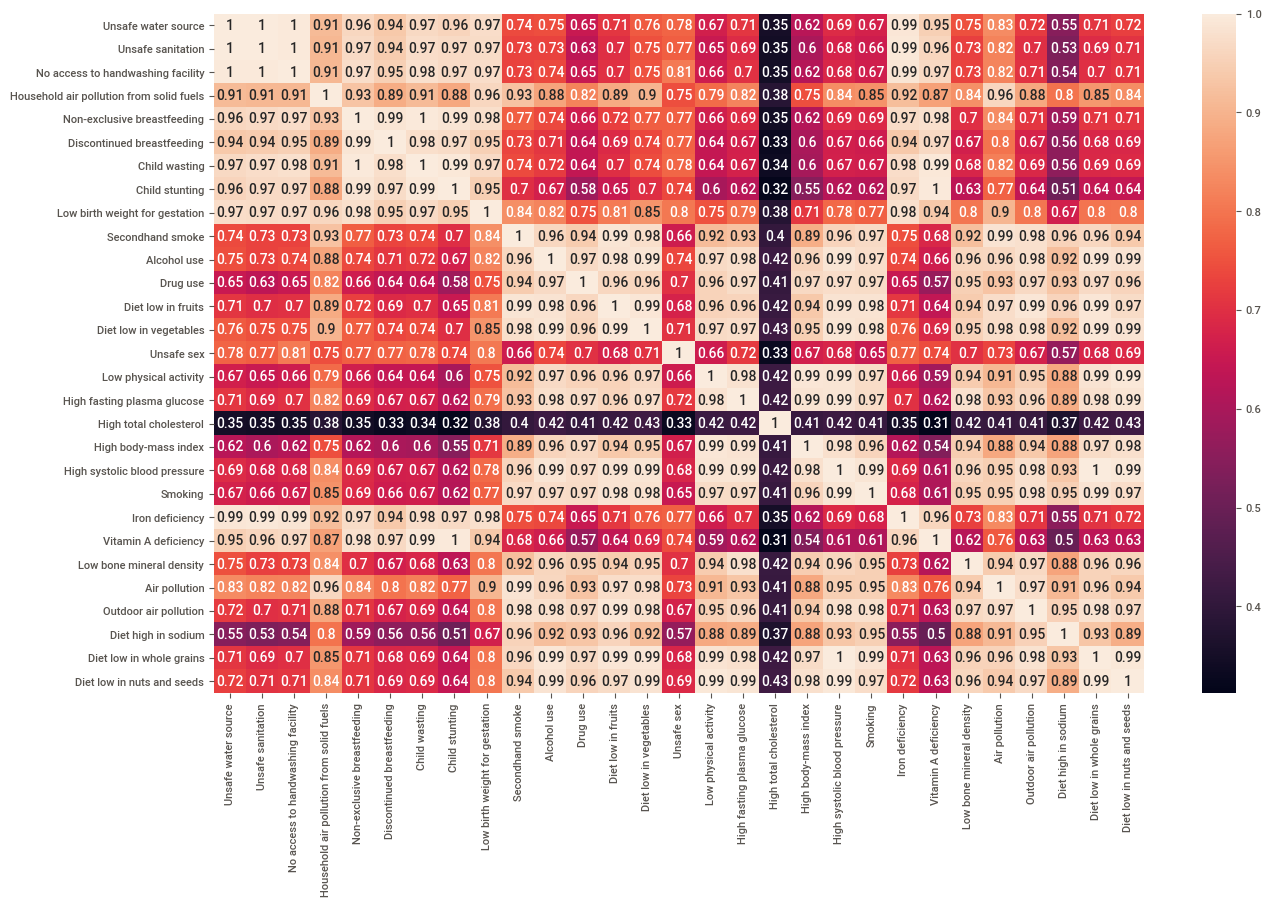

In [58]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

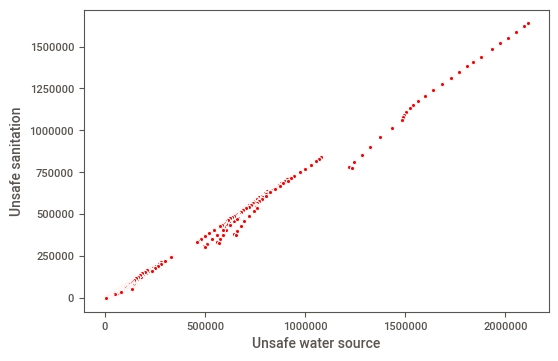

In [61]:
sns.scatterplot(x=df["Unsafe water source"], y=df["Unsafe sanitation"],data=df,color='red')

In [62]:
df.corr().abs()['Discontinued breastfeeding'].sort_values(ascending = False)

Discontinued breastfeeding                  1.000000
Non-exclusive breastfeeding                 0.987460
Child wasting                               0.978403
Child stunting                              0.970556
Vitamin A deficiency                        0.966192
Low birth weight for gestation              0.950978
No access to handwashing facility           0.950725
Unsafe sanitation                           0.940926
Iron deficiency                             0.936494
Unsafe water source                         0.935980
Household air pollution from solid fuels    0.887914
Air pollution                               0.797316
Unsafe sex                                  0.773397
Diet low in vegetables                      0.736396
Secondhand smoke                            0.733418
Alcohol use                                 0.712291
Diet low in fruits                          0.691010
Diet low in nuts and seeds                  0.685619
Diet low in whole grains                    0.

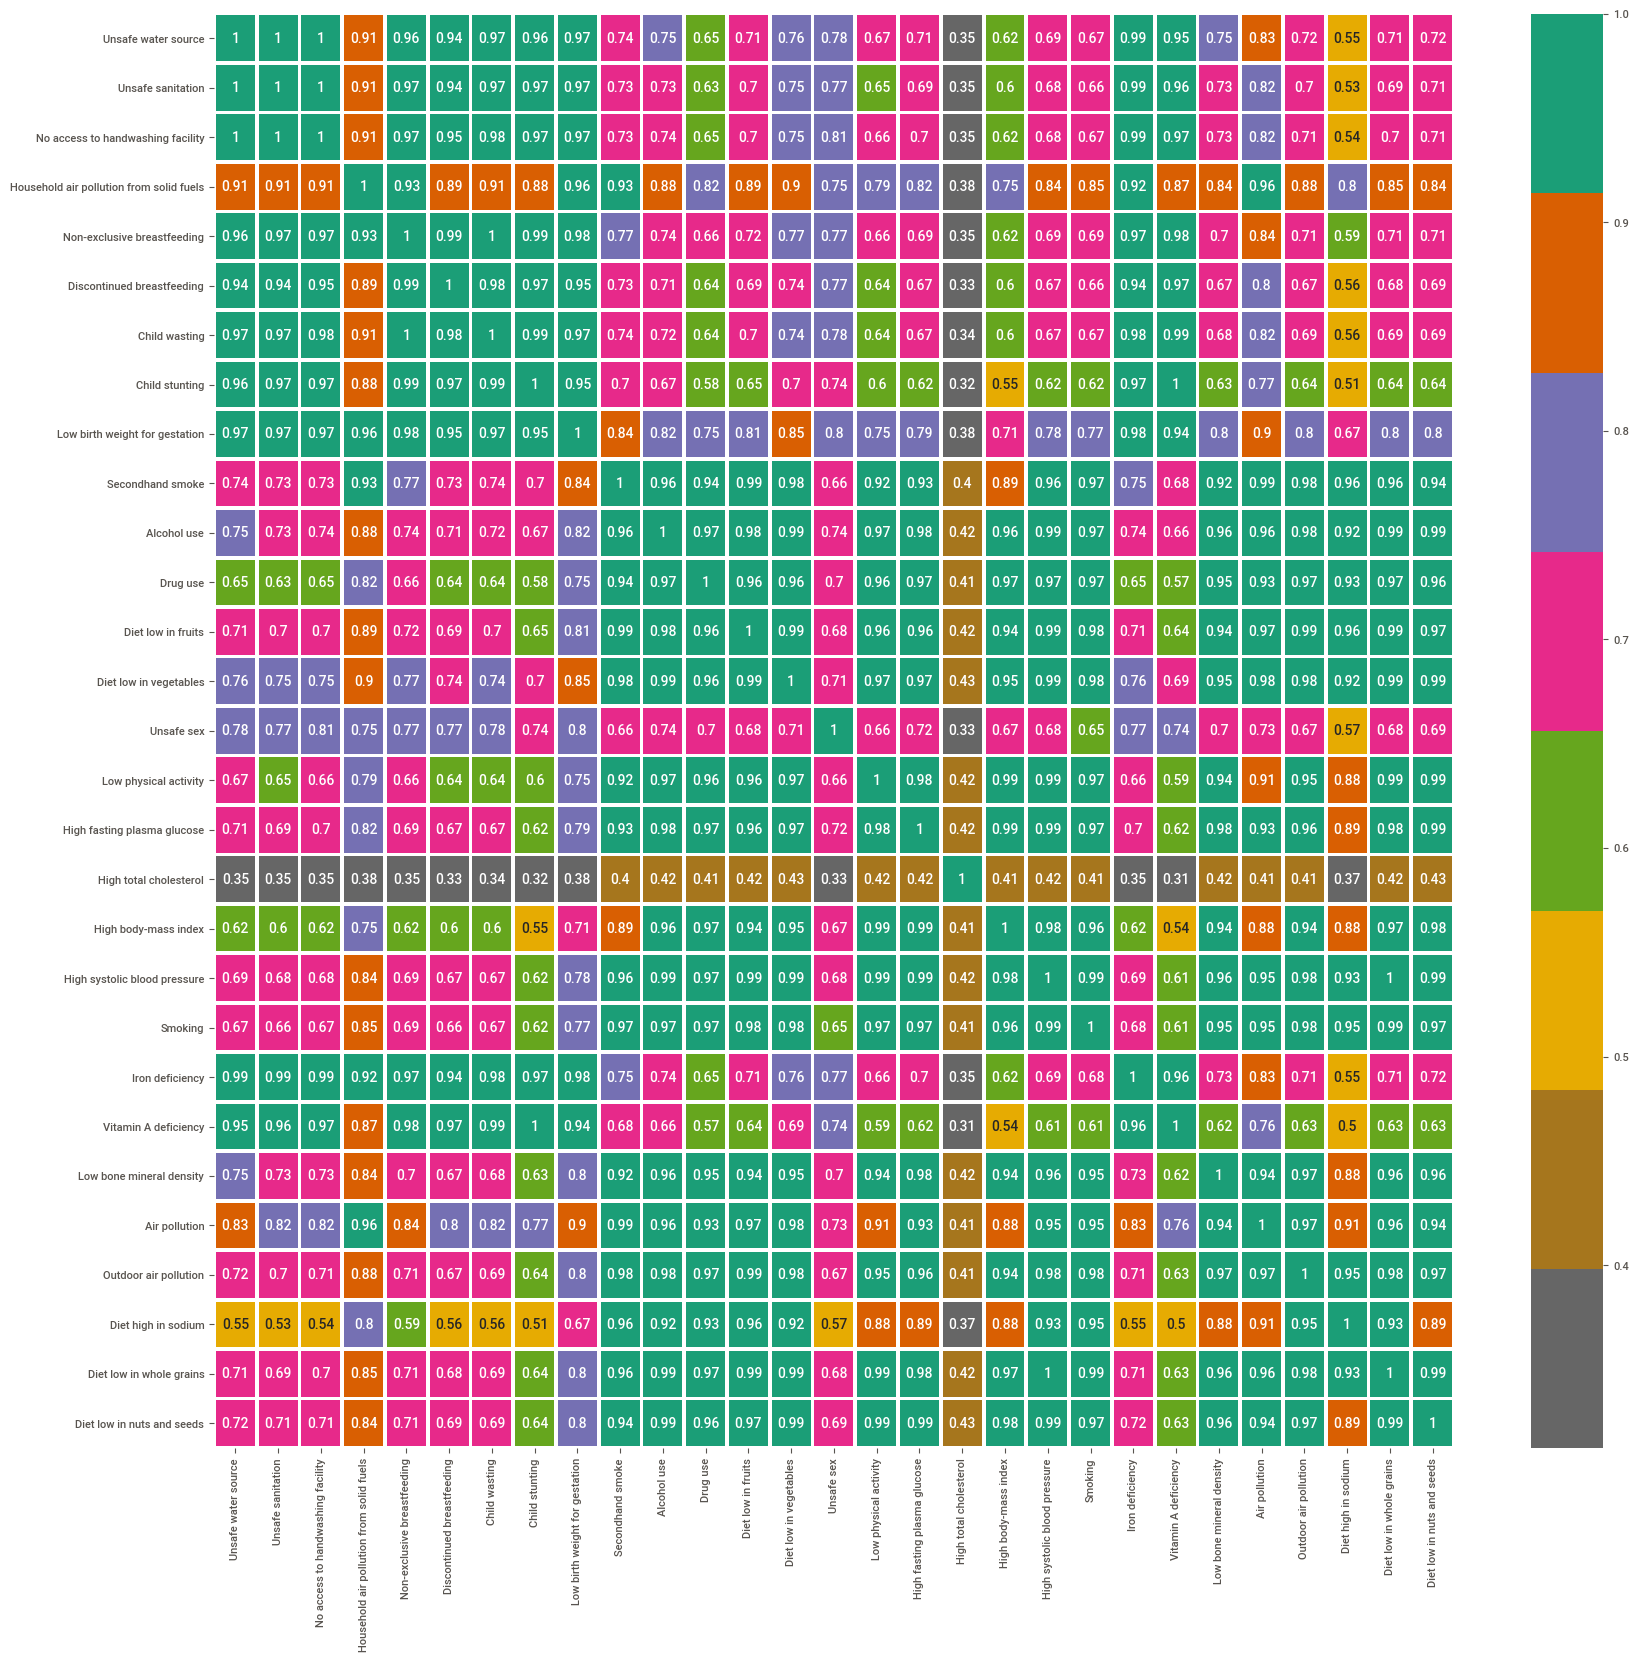

In [66]:
plt.figure(figsize = (20,19))
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

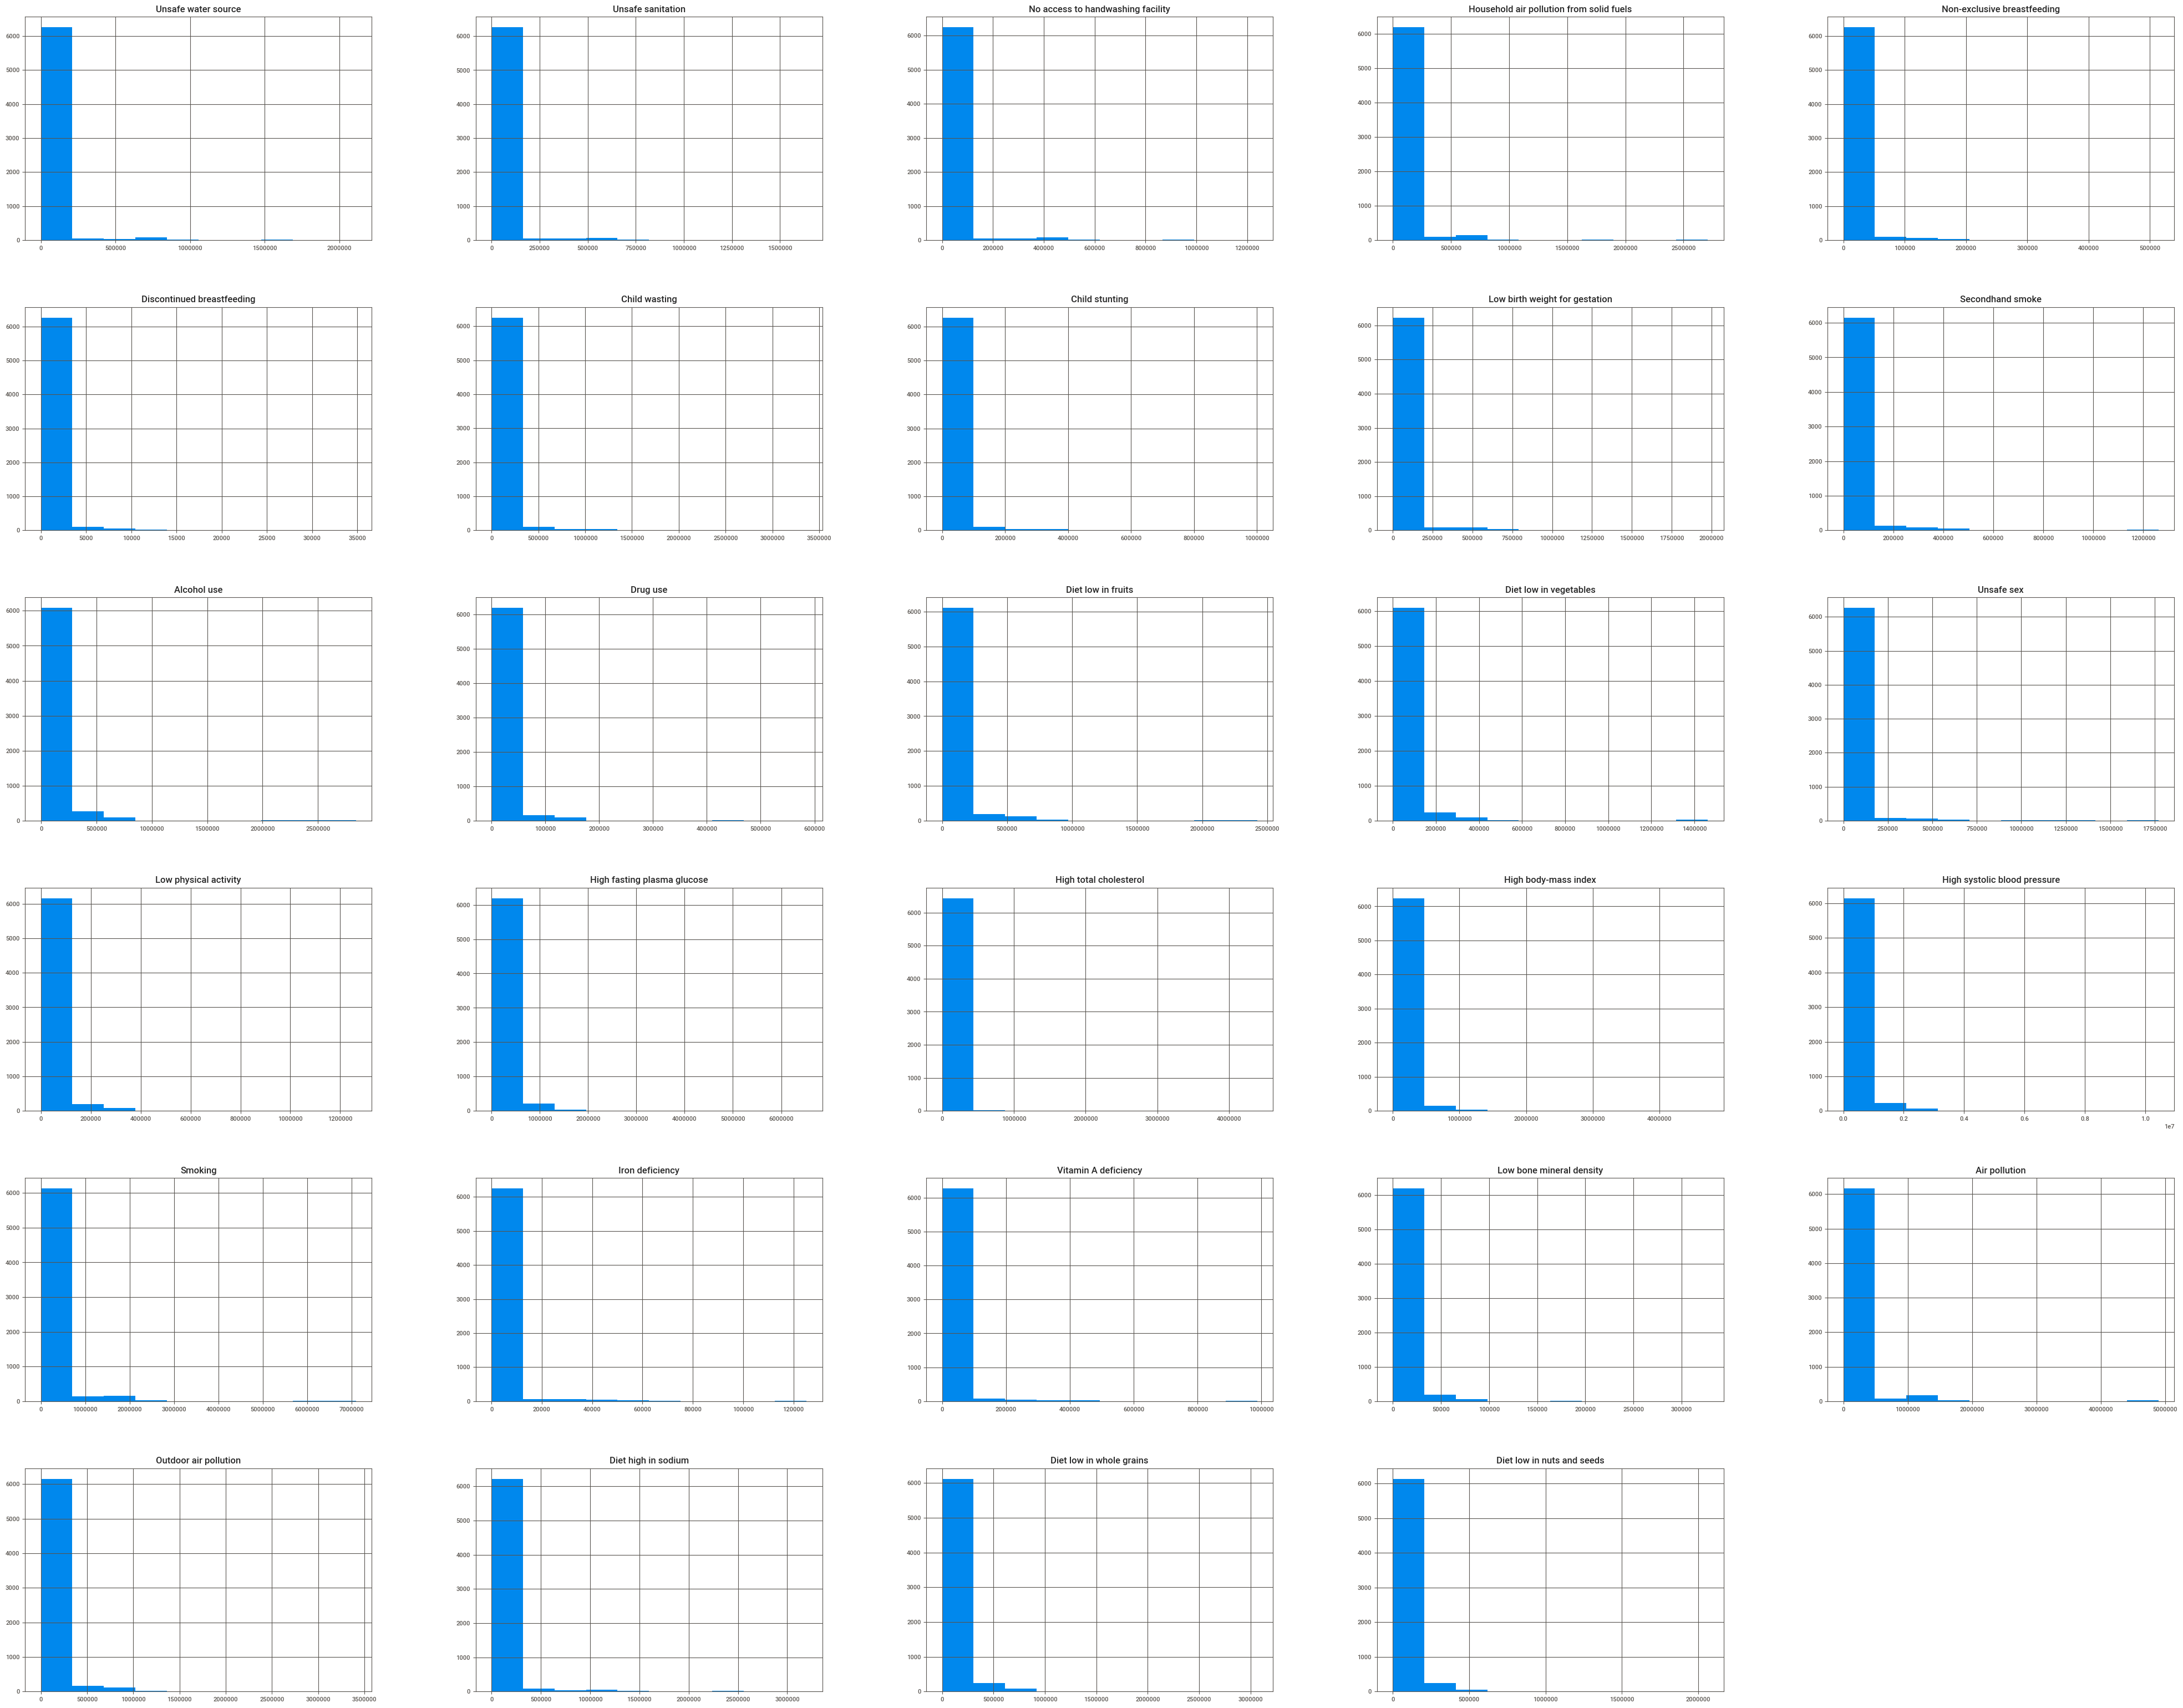

In [67]:
df.hist(figsize=(50,40))
plt.show()

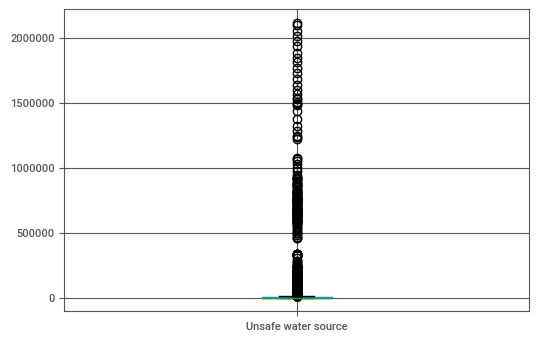

In [71]:
df.boxplot(column="Unsafe water source")

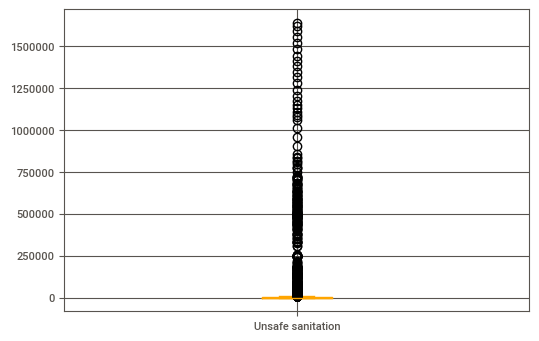

In [72]:
df.boxplot(column="Unsafe sanitation",color='orange')

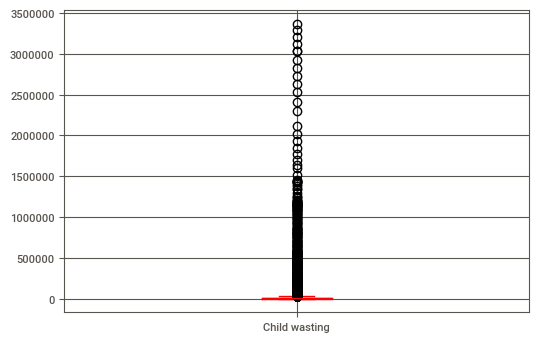

In [73]:
df.boxplot(column="Child wasting",color='red')

In [74]:
df.columns

Index(['Entity', 'Unsafe water source', 'Unsafe sanitation',
       'No access to handwashing facility',
       'Household air pollution from solid fuels',
       'Non-exclusive breastfeeding', 'Discontinued breastfeeding',
       'Child wasting', 'Child stunting', 'Low birth weight for gestation',
       'Secondhand smoke', 'Alcohol use', 'Drug use', 'Diet low in fruits',
       'Diet low in vegetables', 'Unsafe sex', 'Low physical activity',
       'High fasting plasma glucose', 'High total cholesterol',
       'High body-mass index', 'High systolic blood pressure', 'Smoking',
       'Iron deficiency', 'Vitamin A deficiency', 'Low bone mineral density',
       'Air pollution', 'Outdoor air pollution', 'Diet high in sodium',
       'Diet low in whole grains', 'Diet low in nuts and seeds'],
      dtype='object')

In [92]:
sns.pairplot(df)

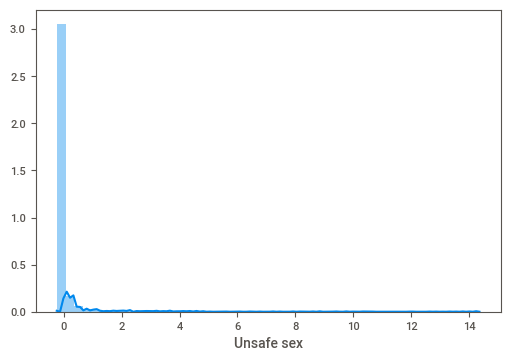

In [89]:
sns.distplot(df['Unsafe sex'])

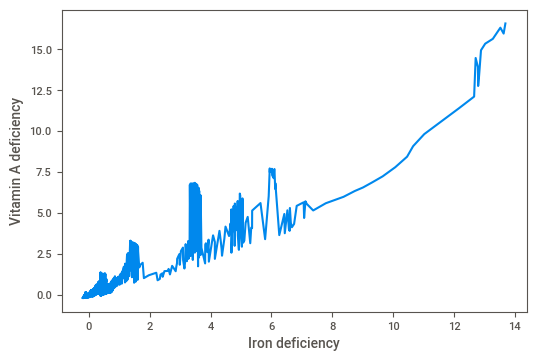

In [88]:
sns.lineplot(x=df["Iron deficiency"], y=df["Vitamin A deficiency"], 
data=df)

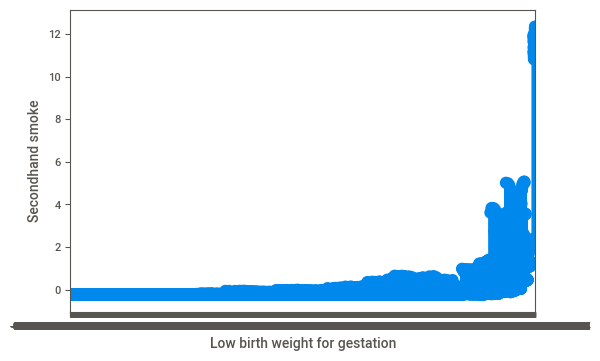

In [85]:
sns.pointplot(x=df["Low birth weight for gestation"], y=df["Secondhand smoke"], 
data=df)

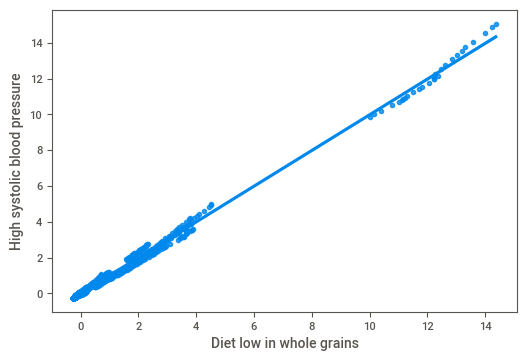

In [84]:
sns.regplot(x=df["Diet low in whole grains"], y=df["High systolic blood pressure"], 
data=df)

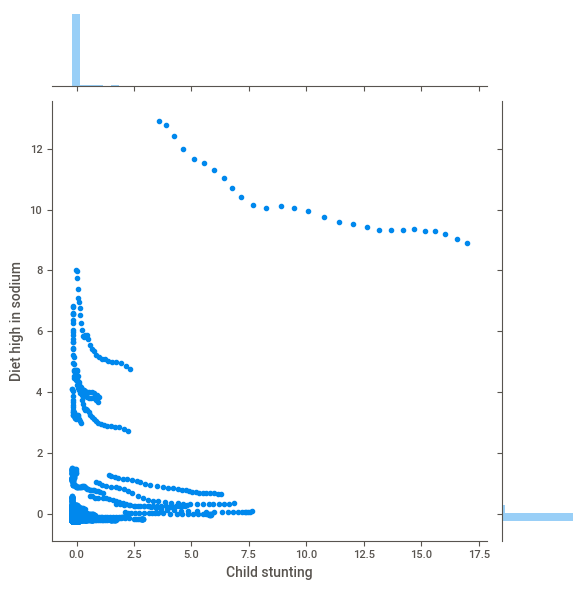

In [79]:
sns.jointplot(x="Child stunting",y="Diet high in sodium",data=df)

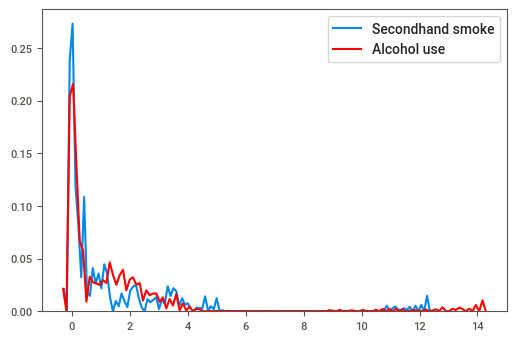

In [83]:
sns.kdeplot(df['Secondhand smoke'])
#sns.kdeplot(df['student2'])
sns.kdeplot(df['Alcohol use'],color='red')

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [76]:
man=MinMaxScaler()
feat=['Unsafe water source', 'Unsafe sanitation',
       'No access to handwashing facility',
       'Household air pollution from solid fuels',
       'Non-exclusive breastfeeding', 'Discontinued breastfeeding',
       'Child wasting', 'Child stunting', 'Low birth weight for gestation',
       'Secondhand smoke', 'Alcohol use', 'Drug use', 'Diet low in fruits',
       'Diet low in vegetables', 'Unsafe sex', 'Low physical activity',
       'High fasting plasma glucose', 'High total cholesterol',
       'High body-mass index', 'High systolic blood pressure', 'Smoking',
       'Iron deficiency', 'Vitamin A deficiency', 'Low bone mineral density',
       'Air pollution', 'Outdoor air pollution', 'Diet high in sodium',
       'Diet low in whole grains', 'Diet low in nuts and seeds']
df[feat]=man.fit_transform(df[feat])
df[feat]

Unsafe water source  Unsafe sanitation  \
0                0.003577           0.003594   
1                0.003485           0.003500   
2                0.003623           0.003635   
3                0.004864           0.004876   
4                0.005403           0.005411   
...                   ...                ...   
6463             0.002015           0.001818   
6464             0.001941           0.001744   
6465             0.001857           0.001659   
6466             0.001801           0.001602   
6467             0.001798           0.001595   

      No access to handwashing facility  \
0                              0.004366   
1                              0.004266   
2                              0.004443   
3                              0.005732   
4                              0.006496   
...                                 ...   
6463                           0.003157   
6464                           0.003073   
6465                           0.002976   
6466                           0.002907   
6467                           0.002888   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                                     0.008265                     0.006266   
1                                     0.008169                     0.006128   
2                                     0.008444                     0.006480   
3                                     0.009450                     0.008708   
4                                     0.010341                     0.009925   
...                                        ...                          ...   
6463                                  0.002811                     0.002019   
6464                                  0.002743                     0.001892   
6465                                  0.002683                     0.001774   
6466                                  0.002634                     0.001703   
6467                                  0.002578                     0.001686   

      Discontinued breastfeeding  Child wasting  Child stunting  \
0                       0.004479       0.006769        0.010395   
1                       0.004348       0.006624        0.010259   
2                       0.004494       0.006865        0.010605   
3                       0.005935       0.008291        0.012244   
4                       0.006712       0.009785        0.014180   
...                          ...            ...             ...   
6463                    0.001697       0.002289        0.001316   
6464                    0.001559       0.002199        0.001258   
6465                    0.001442       0.002110        0.001204   
6466                    0.001369       0.002028        0.001098   
6467                    0.001343       0.001964        0.001020   

      Low birth weight for gestation  Secondhand smoke  ...  \
0                           0.006156          0.003356  ...   
1                           0.006253          0.003344  ...   
2                           0.006809          0.003465  ...   
3                           0.009338          0.003855  ...   
4                           0.010097          0.004195  ...   
...                              ...               ...  ...   
6463                        0.003016          0.001454  ...   
6464                        0.002901          0.001427  ...   
6465                        0.002827          0.001405  ...   
6466                        0.002753          0.001394  ...   
6467                        0.002676          0.001390  ...   

      High systolic blood pressure   Smoking  Iron deficiency  \
0                         0.002697  0.000899         0.005800   
1                         0.002721  0.000904         0.005902   
2                         0.002792  0.000923         0.006974   
3                         0.002878  0.000947         0.008304   
4                         0.002949  0.000969         0.008797   
...        

In [77]:
std=StandardScaler()
feat=['Unsafe water source', 'Unsafe sanitation',
       'No access to handwashing facility',
       'Household air pollution from solid fuels',
       'Non-exclusive breastfeeding', 'Discontinued breastfeeding',
       'Child wasting', 'Child stunting', 'Low birth weight for gestation',
       'Secondhand smoke', 'Alcohol use', 'Drug use', 'Diet low in fruits',
       'Diet low in vegetables', 'Unsafe sex', 'Low physical activity',
       'High fasting plasma glucose', 'High total cholesterol',
       'High body-mass index', 'High systolic blood pressure', 'Smoking',
       'Iron deficiency', 'Vitamin A deficiency', 'Low bone mineral density',
       'Air pollution', 'Outdoor air pollution', 'Diet high in sodium',
       'Diet low in whole grains', 'Diet low in nuts and seeds']
df[feat]=std.fit_transform(df[feat])
df[feat]

Unsafe water source  Unsafe sanitation  \
0               -0.157188          -0.152743   
1               -0.158461          -0.154096   
2               -0.156557          -0.152157   
3               -0.139404          -0.134408   
4               -0.131952          -0.126754   
...                   ...                ...   
6463            -0.178789          -0.178162   
6464            -0.179807          -0.179221   
6465            -0.180969          -0.180432   
6466            -0.181748          -0.181248   
6467            -0.181788          -0.181355   

      No access to handwashing facility  \
0                             -0.150559   
1                             -0.151945   
2                             -0.149509   
3                             -0.131715   
4                             -0.121171   
...                                 ...   
6463                          -0.167252   
6464                          -0.168410   
6465                          -0.169755   
6466                          -0.170705   
6467                          -0.170970   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                                    -0.110248                    -0.105566   
1                                    -0.111631                    -0.108041   
2                                    -0.107663                    -0.101701   
3                                    -0.093141                    -0.061525   
4                                    -0.080285                    -0.039585   
...                                        ...                          ...   
6463                                 -0.188955                    -0.182127   
6464                                 -0.189936                    -0.184409   
6465                                 -0.190801                    -0.186535   
6466                                 -0.191507                    -0.187817   
6467                                 -0.192318                    -0.188126   

      Discontinued breastfeeding  Child wasting  Child stunting  \
0                      -0.134951      -0.102203       -0.023338   
1                      -0.137382      -0.104607       -0.025680   
2                      -0.134678      -0.100604       -0.019724   
3                      -0.107889      -0.076865        0.008454   
4                      -0.093437      -0.052010        0.041725   
...                          ...            ...             ...   
6463                   -0.186661      -0.176754       -0.179424   
6464                   -0.189229      -0.178247       -0.180408   
6465                   -0.191405      -0.179734       -0.181341   
6466                   -0.192758      -0.181102       -0.183157   
6467                   -0.193239      -0.182163       -0.184503   

      Low birth weight for gestation  Secondhand smoke  ...  \
0                          -0.139848         -0.199978  ...   
1                          -0.138418         -0.200129  ...   
2                          -0.130234         -0.198610  ...   
3                          -0.093009         -0.193706  ...   
4                          -0.081838         -0.189428  ...   
...                              ...               ...  ...   
6463                       -0.186071         -0.223906  ...   
6464                       -0.187756         -0.224243  ...   
6465                       -0.188854         -0.224519  ...   
6466                       -0.189946         -0.224651  ...   
6467                       -0.191081         -0.224708  ...   

      High systolic blood pressure   Smoking  Iron deficiency  \
0                        -0.214702 -0.239964        -0.127876   
1                        -0.214333 -0.239897        -0.126454   
2                        -0.213249 -0.239648        -0.111557   
3                        -0.211926 -0.239326        -0.093073   
4                        -0.210847 -0.239029        -0.086224   
...        